In [4]:
import pandas as pd
import glob
from pathlib import Path
import tqdm
import numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [5]:
data_dir = Path('/content/drive/MyDrive/TAQA/raw')
csv_paths = sorted(data_dir.glob('*.csv'))
print(f'Found {len(csv_paths)} CSV in my repo')

Found 45 CSV in my repo


In [6]:
frames= []
for file in tqdm.tqdm(csv_paths, desc="Reading"):
  df = pd.read_csv(file, parse_dates = ['Timestamp'])

  value_col = df.columns[1]
  df = df.rename(columns={value_col: 'Value'})[['Timestamp', 'Value']]

  parts = file.stem.split('.')
  _,tool,kind,param = parts
  df['Tool'] = tool
  df['Kind'] = kind
  df['param']= param
  frames.append(df)

raw = pd.concat(frames, ignore_index=True)
raw

Reading: 100%|██████████| 45/45 [01:31<00:00,  2.04s/it]


,Timestamp,Value,Tool,Kind,param
0,2025-02-17 09:12:56.373838+00:00,14.14728,P8-1,SIT,Battery-Voltage
1,2025-02-17 09:12:56.373838+00:00,14.14728,P8-1,SIT,Battery-Voltage
2,2025-02-17 09:12:56.373838+00:00,14.14728,P8-1,SIT,Battery-Voltage
3,2025-02-17 09:12:56.373838+00:00,14.14728,P8-1,SIT,Battery-Voltage
4,2025-02-17 09:12:56.373838+00:00,14.14728,P8-1,SIT,Battery-Voltage
...,...,...,...,...,...
12773606,2025-03-05 10:16:39.296635100+00:00,18.01871,P8-7,SIT,Upstream-Temperature
12773607,2025-03-03 10:12:41.730917600+00:00,15.43045,P8-7,SIT,Upstream-Temperature
12773608,2025-03-24 15:28:19.673987900+00:00,108.59230,P8-7,SIT,Upstream-Temperature
12773609,2025-03-24 15:28:19.673987900+00:00,108.59230,P8-7,SIT,Upstream-Temperature


In [7]:
wide = (raw.pivot_table(index=['Tool', 'Timestamp'],columns= 'param', values='Value').reset_index()) #reset index will max the index into a column

wide

param,Tool,Timestamp,Battery-Voltage,Choke-Position,Downstream-Pressure,Downstream-Temperature,Downstream-Upstream-Difference,Local-Motor-Current,Local-Motor-Speed,Upstream-Pressure,Upstream-Temperature
0,P8-1,2025-02-17 09:12:56.373838+00:00,14.14728,100.1176,15.36703,14.12418,-4.313263,0.0,0.0,19.68030,14.20404
1,P8-1,2025-02-17 09:12:57.384841500+00:00,14.14728,100.1176,15.36871,14.12436,-4.123230,0.0,0.0,19.49194,14.20425
2,P8-1,2025-02-17 09:12:58.383848+00:00,14.15137,100.1176,15.36885,14.12439,-3.998016,0.0,0.0,19.36687,14.20432
3,P8-1,2025-02-17 09:12:59.397851+00:00,14.14728,100.1470,15.36862,14.12445,-3.916000,0.0,0.0,19.28462,14.20441
4,P8-1,2025-02-17 09:13:00.396942400+00:00,14.14319,100.1176,15.36815,14.12457,-3.861160,0.0,0.0,19.22931,14.20450
...,...,...,...,...,...,...,...,...,...,...,...
1420129,P8-7,2025-03-24 15:28:14.635897800+00:00,13.93045,101.2432,1561.62900,108.11880,2.270142,0.0,0.0,1559.35900,108.59210
1420130,P8-7,2025-03-24 15:28:15.651836900+00:00,13.93454,101.2162,1561.62400,108.11890,2.266998,0.0,0.0,1559.35700,108.59210
1420131,P8-7,2025-03-24 15:28:17.917886500+00:00,13.93045,101.2432,1561.61900,108.11890,2.263290,0.0,0.0,1559.35500,108.59220
1420132,P8-7,2025-03-24 15:28:18.678905500+00:00,13.93454,101.2432,1561.60900,108.11900,2.257965,0.0,0.0,1559.35100,108.59220


In [8]:
cols = ['Timestamp', 'Tool'] + [c for c in wide.columns if c not in ('Timestamp', 'Tool')] #rearranging the columns
wide = wide[cols]
print(wide.shape)
wide.head(3)

(1420134, 11)


param,Timestamp,Tool,Battery-Voltage,Choke-Position,Downstream-Pressure,Downstream-Temperature,Downstream-Upstream-Difference,Local-Motor-Current,Local-Motor-Speed,Upstream-Pressure,Upstream-Temperature
0,2025-02-17 09:12:56.373838+00:00,P8-1,14.14728,100.1176,15.36703,14.12418,-4.313263,0.0,0.0,19.68030,14.20404
1,2025-02-17 09:12:57.384841500+00:00,P8-1,14.14728,100.1176,15.36871,14.12436,-4.123230,0.0,0.0,19.49194,14.20425
2,2025-02-17 09:12:58.383848+00:00,P8-1,14.15137,100.1176,15.36885,14.12439,-3.998016,0.0,0.0,19.36687,14.20432


In [9]:
plt.rcParams['figure.figsize'] = (10,4)

wide['Timestamp'] = pd.to_datetime(wide['Timestamp'], utc=True)
wide= wide.sort_values('Timestamp')
param_columns = [c for c in wide.columns if c not in ('Timestamp', 'Tool')]

In [10]:
wide.dtypes

,0
param,
Timestamp,"datetime64[ns, UTC]"
Tool,object
Battery-Voltage,float64
Choke-Position,float64
Downstream-Pressure,float64
Downstream-Temperature,float64
Downstream-Upstream-Difference,float64
Local-Motor-Current,float64
Local-Motor-Speed,float64


In [11]:
raw_nd = (raw.drop_duplicates(subset=['Tool','param','Timestamp']).sort_values(['Tool','param','Timestamp']))

gaps = (raw_nd
        .assign(dt = raw_nd
                  .groupby(['Tool','param'])
                  .Timestamp.diff()
                  .dt.total_seconds())
        .dropna(subset=['dt'])
        .query('dt > 0.1'))


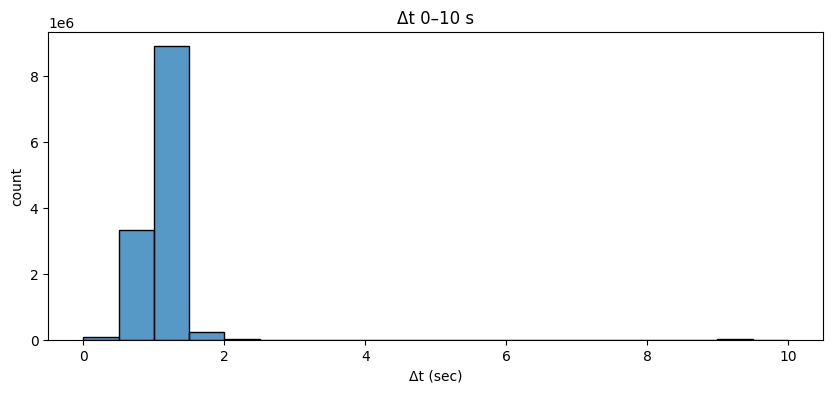

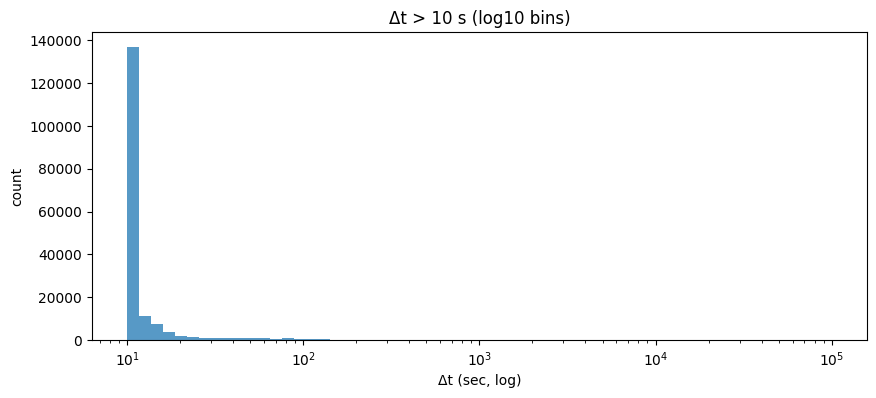

In [12]:
# Fine-grained 0-10 s region
sns.histplot(gaps['dt'], bins=np.arange(0, 10.5, 0.5), kde=False)
plt.xlabel('Δt (sec)'); plt.ylabel('count'); plt.title('Δt 0–10 s')
plt.show()

# Rare long gaps (>10 s) on log scale
long = gaps[gaps['dt'] > 10]
if not long.empty:
    sns.histplot(long['dt'], bins=np.logspace(1, 5, 60))
    plt.xscale('log'); plt.xlabel('Δt (sec, log)'); plt.ylabel('count')
    plt.title('Δt > 10 s (log10 bins)'); plt.show()


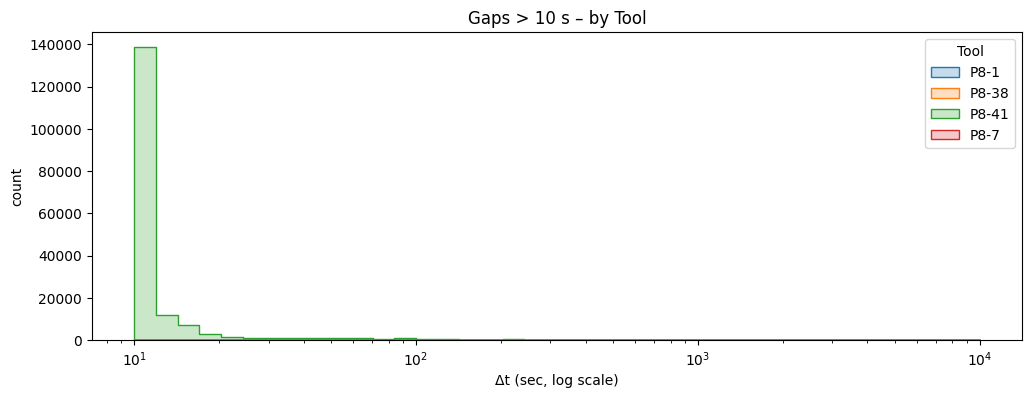

,count,median,max
Tool,,,
P8-41,172080,10.123763,1.044017e+06
P8-7,673,58.697074,1.970449e+06
P8-38,261,171.006857,1.132559e+07
P8-1,36,301597.122209,7.885832e+05


In [13]:
import seaborn as sns, matplotlib.pyplot as plt

long_gaps = gaps[gaps['dt'] > 10]          # focus only on the “bad” gaps
tools = long_gaps['Tool'].unique()

plt.figure(figsize=(12,4))
sns.histplot(data=long_gaps,     x='dt', hue='Tool',
             bins=np.logspace(1, 4, 40),  # 10 s … 10 000 s
             element='step', stat='count')     # outline histograms
plt.xscale('log')
plt.xlabel('Δt (sec, log scale)'); plt.ylabel('count')
plt.title('Gaps > 10 s – by Tool'); plt.show()

tool_stats = (long_gaps.groupby('Tool')['dt']
              .agg(count='size',
                   median='median',
                   max='max')
              .sort_values('count', ascending=False))

display(tool_stats.head(10))



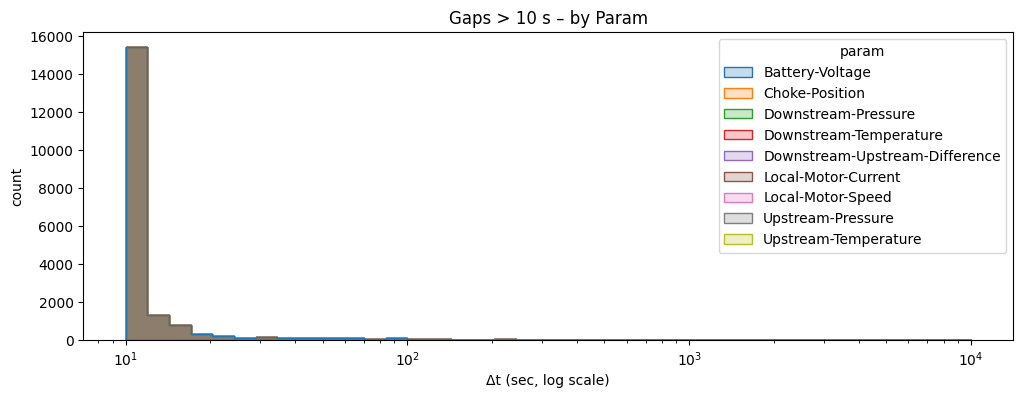

,count,median,max
param,,,
Battery-Voltage,19230,10.123941,1.132559e+07
Downstream-Pressure,19228,10.123928,1.132559e+07
Downstream-Temperature,19228,10.123928,1.132559e+07
Upstream-Temperature,19228,10.123928,1.132559e+07
Local-Motor-Speed,19228,10.123928,1.132559e+07
Downstream-Upstream-Difference,19227,10.123922,1.132559e+07
Choke-Position,19227,10.123922,1.132559e+07
Local-Motor-Current,19227,10.123922,1.132559e+07
Upstream-Pressure,19227,10.123922,1.132559e+07


In [14]:
plt.figure(figsize=(12,4))
sns.histplot(data=long_gaps, x='dt', hue='param',
             bins=np.logspace(1, 4, 40),
             element='step', stat='count')
plt.xscale('log')
plt.xlabel('Δt (sec, log scale)'); plt.ylabel('count')
plt.title('Gaps > 10 s – by Param'); plt.show()

param_stats = (long_gaps.groupby('param')['dt']
               .agg(count='size',
                    median='median',
                    max='max')
               .sort_values('count', ascending=False))

display(param_stats)


In [15]:
q = gaps['dt'].quantile([0, .25, .5, .75, .9, .95, .99, 1])
display(q.to_frame('seconds'))

,seconds
0.00,2.362116e-01
0.25,9.990644e-01
0.50,1.007983e+00
0.75,1.022048e+00
0.90,1.114195e+00
0.95,1.331577e+00
0.99,1.010370e+01
1.00,1.132559e+07


In [16]:
total   = len(gaps)                       # after removing dt<=0
over10  = (gaps['dt'] > 10).sum()
pct     = over10 * 100 / total
print(f"Gaps >10 s : {over10:,d}  ({pct:.2f} % of all {total:,d} gaps)")

Gaps >10 s : 173,050  (1.35 % of all 12,773,028 gaps)


Value Distribution

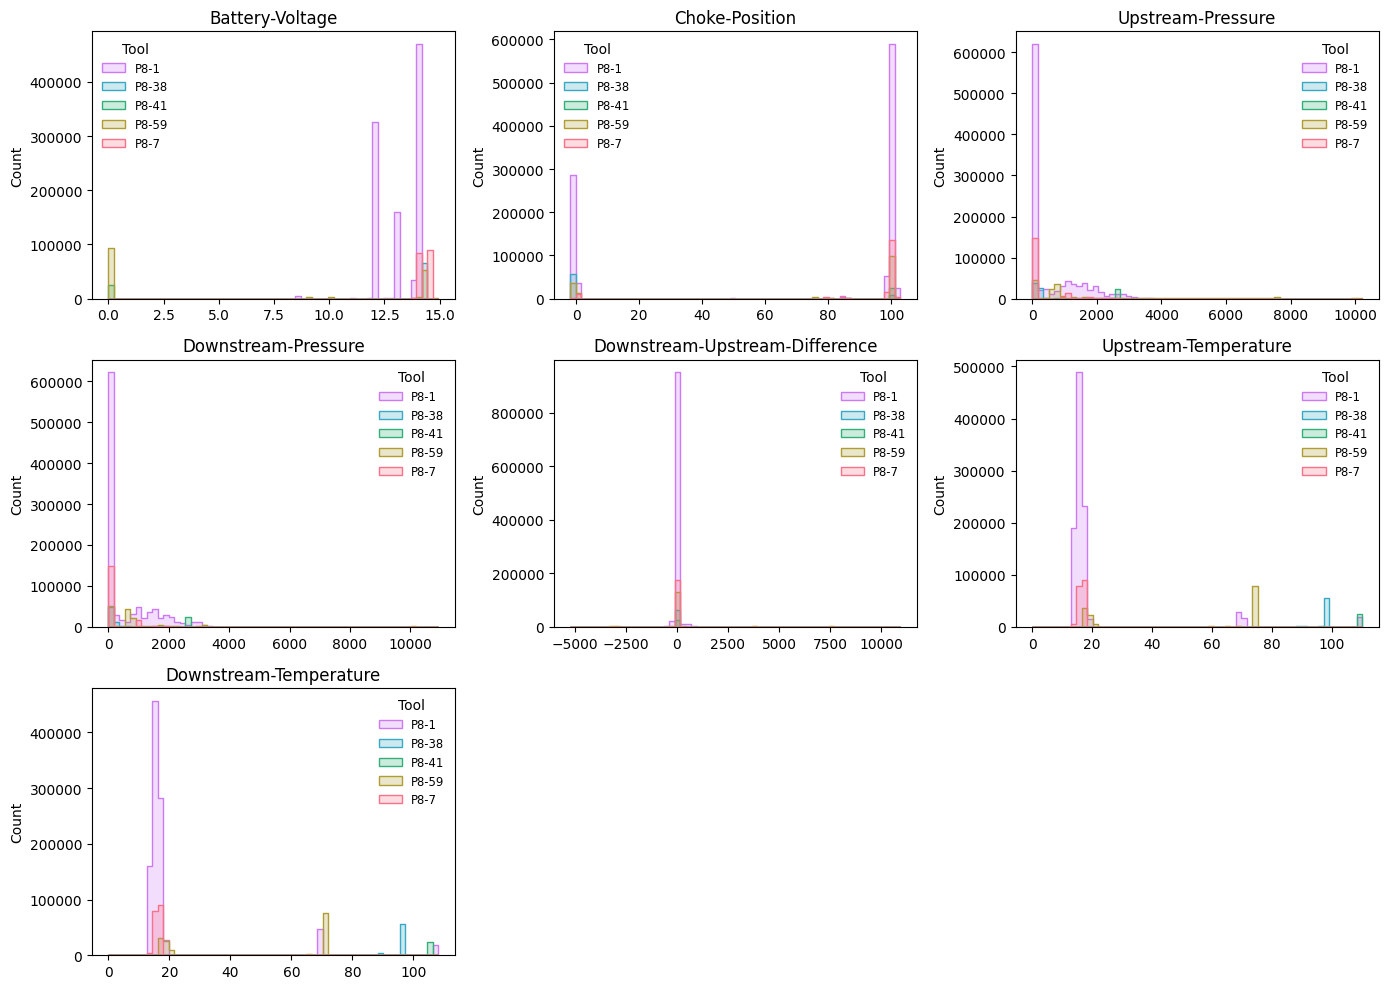

In [18]:
import seaborn as sns, matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
palette = sns.color_palette('Set2', n_colors=raw['Tool'].nunique())
PARAMS = ['Battery-Voltage', 'Choke-Position',
          'Upstream-Pressure', 'Downstream-Pressure',
          'Downstream-Upstream-Difference',
          'Upstream-Temperature', 'Downstream-Temperature']

tools   = sorted(raw_nd['Tool'].unique())
pal     = dict(zip(tools, sns.color_palette('husl', len(tools))))

fig, axes = plt.subplots(3, 3, figsize=(14, 10), sharey=False)
axes = axes.flatten()

for ax, p in zip(axes, PARAMS):
    sns.histplot(data   = raw_nd[raw_nd.param == p],
                 x      = 'Value',
                 hue    = 'Tool',
                 bins   = 60,
                 palette= pal,
                 multiple='layer',   # outlines separated
                 element='step',
                 ax=ax,
                 stat='count',
                 common_norm=False)

    ax.set_title(p)
    ax.set_xlabel('')
    ax.legend(title='Tool', fontsize='small', frameon=False, labels=sorted(raw_nd['Tool'].unique()))


for ax in axes[len(PARAMS):]:
    ax.axis('off')

fig.tight_layout()
plt.show()

| Parameter                          | What we see in the plot                                                                                                                         | Implication for the pipeline                                                                                                                                                       |
| ---------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Battery-Voltage**                | • All tools except **P8-59** sit neatly between 12 V and 15 V.<br>• P8-59 shows a tall spike at **0 V** (tool switched off) – not a wrong unit. | • Keep one global hard-rule: **flag < 10 V** as critical.<br>• 0 V blocks will survive the 30 s ffill rule → model will still flag them.                                           |
| **Choke-Position**                 | P8-1 operates at **≈ 100 %** the whole test; all other tools hover near 0 %.                                                                    | • For training we’ll z-score **per tool**, so a “constant 100 %” isn’t an anomaly for P8-1.<br>• Still valuable at inference – if P8-1 suddenly drops to 0 % the model will spike. |
| **Upstream / Downstream-Pressure** | Same unit for every tool; P8-38 & P8-41 run to higher max ψ than P8-1.                                                                          | • No unit mismatch; OK to use ψ values directly.<br>• Per-tool μ/σ prevents higher-pressure tools from dominating.                                                                 |
| **ΔP (Downstream − Upstream)**     | Tight cluster around 0 with small negative tail.                                                                                                | • Confirms Up & Down move together → 2-D Isolation-Forest on the pair; keep ΔP as an extra 1-D backup feature.                                                                     |
| **Temperatures**                   | P8-1 ran at lab ambient (\~15 °C); other tools at 70-110 °C. Units consistent.                                                                  | • Again, per-tool scaling removes bias.<br>• Might add a simple rule: **flag < 0 °C** or > 150 °C before ML.                                                                       |


Bottom-line preprocessing choices confirmed:

10 s resample + forward-fill ≤ 30 s – safe because 98 % of stored intervals are ≤ 2 s and only 1.3 % are > 10 s (mostly from P8-41).

Drop no extra parameters – all seven streams have sensible ranges and std > 0.

Per-tool z-score (store one μ/σ per tool-param).

Hard limits (battery < 10 V, pressure < 0 psi, temp < 0 °C or > 150 °C) evaluated first; ML model runs next.



In [19]:
summary = (raw_nd[raw_nd.param.isin(PARAMS)].groupby(['param']).Value.agg(['min','median','max','std']))
display(summary)


,min,median,max,std
param,,,,
Battery-Voltage,0.000000,14.139100,14.94505,3.841086
Choke-Position,-1.891891,100.513500,102.86490,46.634118
Downstream-Pressure,0.000000,22.681820,10932.98000,1012.014208
Downstream-Temperature,0.000000,16.280880,108.21590,26.618914
Downstream-Upstream-Difference,-5209.666000,-1.644318,10925.18000,569.151351
Upstream-Pressure,0.000000,30.935460,10214.19000,1097.800281
Upstream-Temperature,0.000000,16.349700,110.10000,27.357168


Correlation Matrix

<Axes: xlabel='param', ylabel='param'>

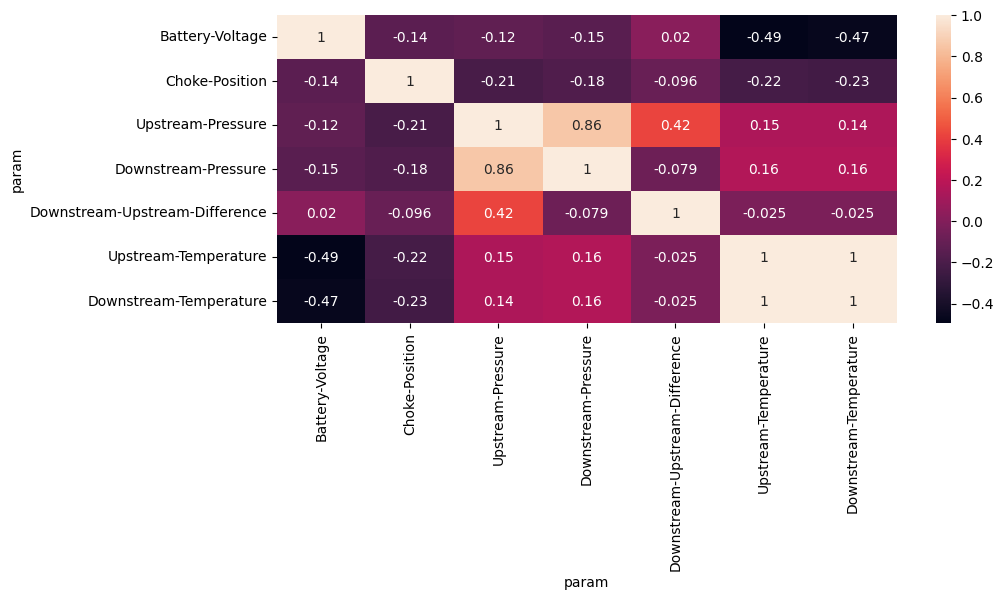

In [ ]:
sns.heatmap(wide[PARAMS].corr(), annot=True)

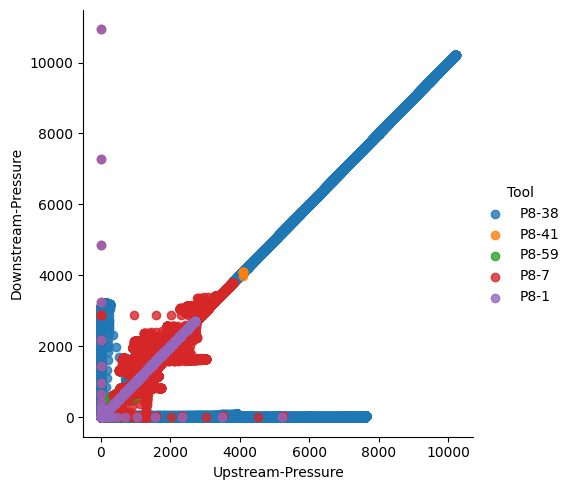

In [ ]:
sns.lmplot(data=wide, x='Upstream-Pressure', y='Downstream-Pressure', hue='Tool', fit_reg=False)

the scatter confirms:

Keep both pressures as a 2D feature.

Drop/NaN rows where either value is physically impossible (<= 0 psi when the other > 200 psi).

No need for additional scaling beyond per-tool z-score.

Rows after 1-min decimation: 27,913


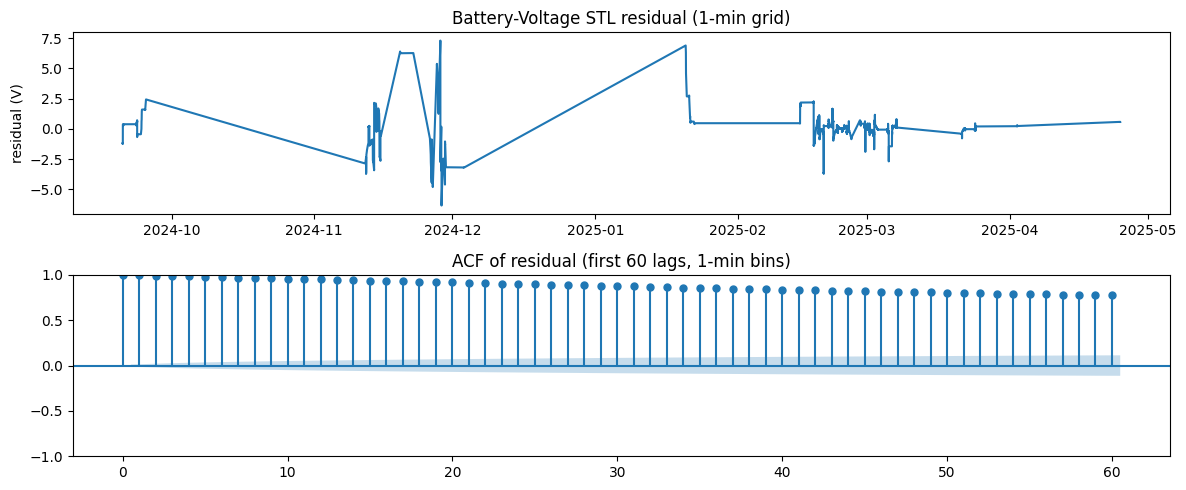

MAD = 0.3193 V  →  use |resid| > 1.596 V as anomaly threshold


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# -------------------------------------------------
# 1. 10-s grid as before
bv10 = (raw_nd.query("param == 'Battery-Voltage'")
        .drop_duplicates(['Tool','Timestamp'])
        .set_index('Timestamp')['Value']
        .resample('10s').mean().dropna())

# 2. Down-sample to 1-minute grid (keep every 6th point)
bv1m = bv10.iloc[::6]
print(f"Rows after 1-min decimation: {len(bv1m):,}")

# 3. STL without robust (much faster)
period = 1440          # 24 h / 1 min  = 1440
stl = sm.tsa.STL(bv1m, period=period, robust=False).fit()
resid = stl.resid

# 4. Plot residual + ACF
fig, ax = plt.subplots(2, 1, figsize=(12, 5))
ax[0].plot(resid)
ax[0].set_title('Battery-Voltage STL residual (1-min grid)')
ax[0].set_ylabel('residual (V)')

plot_acf(resid, lags=60, ax=ax[1])
ax[1].set_title('ACF of residual (first 60 lags, 1-min bins)')
plt.tight_layout(); plt.show()

# 5. Robust scale (MAD)
mad = np.median(np.abs(resid))
print(f"MAD = {mad:.4f} V  →  use |resid| > {5*mad:.3f} V as anomaly threshold")
